<a href="https://colab.research.google.com/github/OsvaldoUfla/Bellman-Ford-Codigo-exemplo/blob/main/07_01_Bellman_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de Bellman-Ford

## Motivação

Considere uma matriz $A \in \mathbb{R}^{m \times n}$, e $b \in \mathbb{R}^m$ um vetor qualquer. 
* Define-se um **Sistema de Restrições de Diferença** por Sistema de Restrições de Diferença por $Ax \le b$, com $x \in \mathbb{R}^n$, em que cada linha da matriz $A$ contém um $1$ e um $-1$, e todas as outras entradas são iguais a $0$.

Tome o sistema abaixo. *Todas as imagens utilizadas foram extraídas de Cormen et al. (2009), Capítulo 24*.

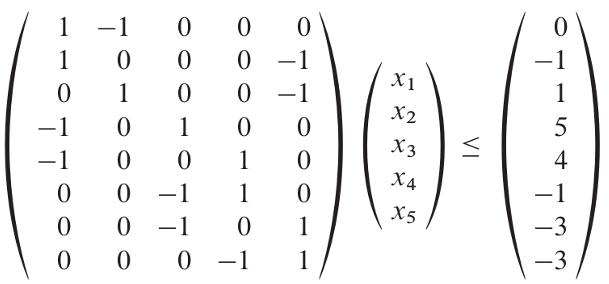

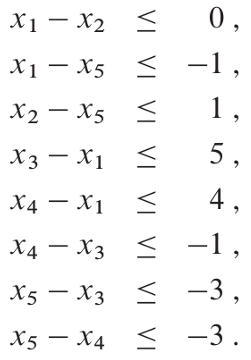

A equação geral do sistema é dada por $x_j − x_i \le b_k$, em que $1 \le i,j \le n$ e $1 \le k \le m$. Para o sistema acima, uma solução possível é dada por $x = (x_1, x_2, x_3, x_4, x_5)^T = (-5,-3,0,-1,-4)^T$.



## Implementação

Pode-se resolver o problema acima a partir do Algoritmo de Bellman-Ford, aplicado para o problema de caminhos mais curtos com fonte única. Para tanto, a modelagem do grafo direcionado ponderado considera os vértices como as variáveis $x$ e os arcos como as relações entre as variáveis nas inequações. Assim, se $x_j - x_i \le b_k$, então existe um arco $(i,j)$ com peso $b_k$. Um vértice artificial $0$ é criado para ser o vértice fonte do Algoritmo de Bellman-Ford. Além disso, considera-se os arcos $(0,i)$ com peso $0$, para todo $i=1,...,n$.

Mais detalhes sobre o Algoritmo de Bellman-Ford podem ser vistos em [slides](https://drive.google.com/file/d/1K9kb0b5e-OwC9kBKG7Dm4n2-eRCTaVln/view?usp=sharing) ou [vídeo-aula](https://www.loom.com/share/7c991057c70a4b698fc8717c95977b84).

In [ ]:
%%writefile bellman_ford.cpp
#include<iostream>
#include<vector>
#include<utility>
using namespace std;

#define INF 1000000000

typedef pair<int, int> ii;
typedef vector<int> vi;
typedef vector<ii> vii;

/*
 * Variaveis globais
 */

// lista de adjacencia
vii* LA;

// valor da variavel x, originalmente relacionada a melhor estimativa de distancia do vertice em relacao a origem
vi x;

// numero de vertices
int n;

// numero de arestas
int m;

void bellman_ford(int org)
{
  x.assign(n, INF);
  x[org] = 0;
  
  // variaveis auxiliares
  int v, peso;
  ii vizinho;
 
  for(int i = 0; i < n - 1; i++)
  {
      for(int u = 0; u < n; u++)
      {
        for(int j = 0; j < (int)LA[u].size(); j++)
        {
            ii vizinho = LA[u][j];
            v = vizinho.first;
            peso = vizinho.second;
            x[v] = min(x[v], x[u] + peso);
        }
      }
  }
}

int main()
{
    cin >> n >> m;
    LA = new vii[n];
 
    int u, v, p;
    for(int j = 0; j < m; j++)
    {
        cin >> u >> v >> p;
        LA[u].push_back(ii(v, p));
    }

    bellman_ford(0);
    for(int i = 0; i < n; i++)
      cout << "x[" << i << "]: " << x[i] << endl;
 
    return 0;
}



Overwriting bellman_ford.cpp


*Compilando o código*

In [ ]:
%%script bash
g++ bellman_ford.cpp -o bellman_ford

*Executando o código*

O grafo da figura abaixo representa o sistema de $5$ variáveis e $8$ mostrado acima.

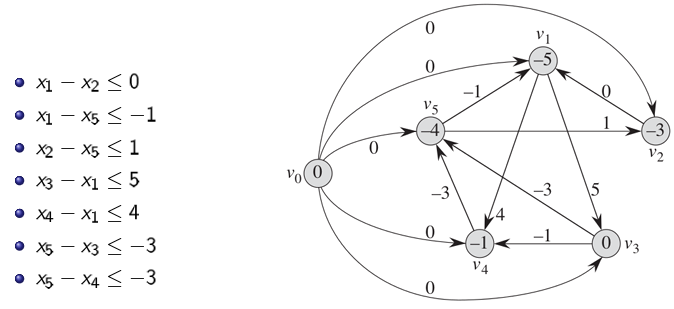

In [ ]:
%%script bash
echo -e "6 13\n0 1 0\n0 2 0\n0 3 0\n0 4 0\n0 5 0\n1 3 5\n1 4 4\n2 1 0\n3 5 -3\n3 4 -1\n4 5 -3\n5 1 -1\n5 2 1\n" > 01.in
./bellman_ford < 01.in

x[0]: 0
x[1]: -5
x[2]: -3
x[3]: 0
x[4]: -1
x[5]: -4


## Referências

* Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to algorithms. MIT press.